# DS201 Exam 2, part 2

The exam is due **Nov 13 at midnight**. Submit `DS201_Exam2_LastFirst.ipynb` file on canvas.  

Dataset: `BreastCancer_data.csv` (on Canvas under the Exam#2 module or loaded in this file) 

About this Dataset: 
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast 
mass. They describe characteristics of the cell nuclei present in the image.  
 
Attribute Information: 
 
1) ID number  

2) Diagnosis (M = malignant, B = benign) 

3-32) Ten real-valued features are computed for each cell nucleus: 
All feature values are recoded with four significant digits. 

Missing attribute values: none 

Class distribution: 357 benign, 212 malignant 

In [2]:
import pandas as pd
df = pd.read_csv('http://lidicky.name/DS201/BreastCancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


(10 points) Create a simple box plot of `radius_mean` by `diagnosis`. Your X axis need to be `diagnosis`. 

<font color="red">What can you tell from the graph?</font> 
<BR> The radius mean by diagnosis for benign has a median of 12 and the minimum radius_mean being 4 and a maximum being 17. The radius_mean by diagnosis for malignant has a median of approximately 17.5 and the minimum radius_mean being 11 and maximum being 29. This means the size of the benign cell is smaller than that of malignant cell.
</BR>

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


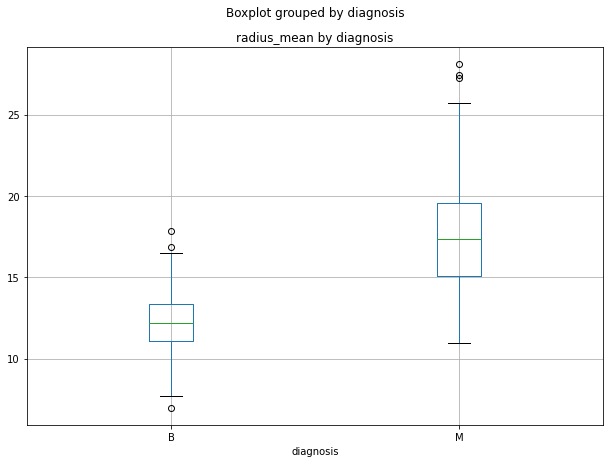

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
df = df.drop_duplicates()
df = df.reset_index(drop = True)
df.boxplot(column = 'radius_mean', by = 'diagnosis', figsize = (10, 7))
plt.title('radius_mean by diagnosis')
plt.show()

(10 points) Create a pairplot by following columns: 

`"radius_mean"`,`"texture_mean"`, `"perimeter_mean"`, `"area_mean"` , `"smoothness_mean"`, `"compactness_mean"`. 
Separate colors by  `'diagnosis'`. 

<font color="red">Which pairs seems to corellated and why?</font> CORRELATED PAIRS: 
<BR> RADIUS MEAN & PERIMETER MEAN</BR>
<BR> RADIUS MEAN & AREA MEAN</BR>
<BR> PERIMETER MEAN & AREA MEAN</BR>
SINCE THESE PAIRS SHOW LINEAR REGRESSION, THEY ARE CORRELATED

<font color="red">Which pair would you use for logostic regression to predict `'diagnosis'` and why?</font> 
<br> PERIMETER MEAN AND AREA MEAN</BR>


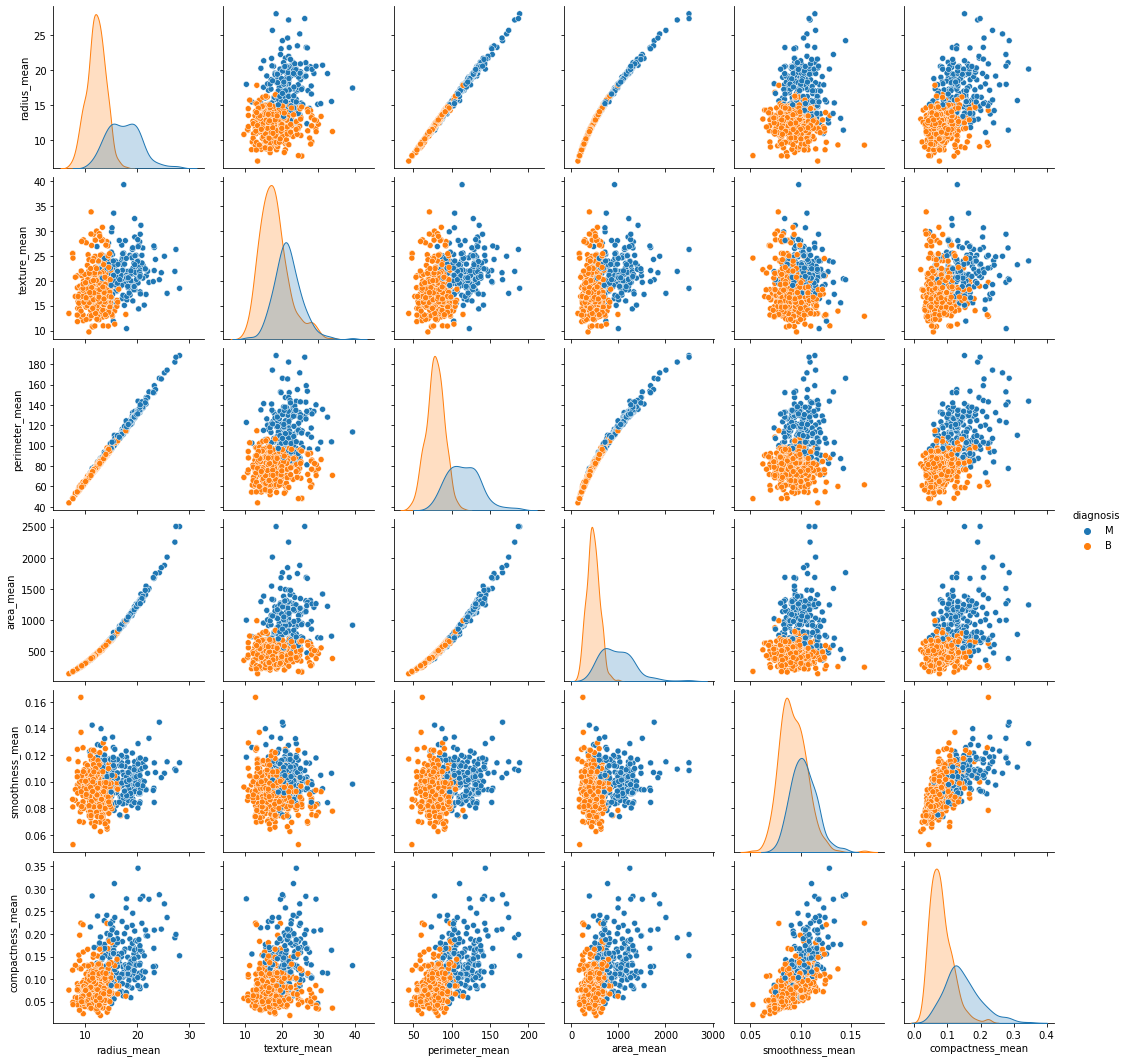

In [4]:
import seaborn as sns
import numpy as np
df1 = df[['diagnosis', 'radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean']]
sns.pairplot(df1, hue = 'diagnosis')
plt.show()

(20 points) Create a bokeh  Scatter plot as following: 
- Saperate Benign and Malignant data 
- x axis: `area_mean` 
- y axis: `texture_mean` 
- the size of datapoints: `radius_mean` 
- Benign datapoints: green circle 
- Malignant datapoints: red triangle 
- title: Benign and Malignant texture_mean(Y) by area_mean(X) with size by  Radius 
- use the lower alpha value (transparency) for Benign to allow Malignant data to be cleary visible 
- legend location: top_left 

Make output of bokeh included in the notebook.

<font color="red">Based on the plot, which classifier would you use to get a `'diagnosis'` and why?</font> I WOULD USE MALIGNANT TO GET DIAGNOSIS SINCE IT IS SPREAD MORE UNIFORMLY AND THROUGHOUT THE PLOT THAN BENIGN.

In [10]:
from bokeh.models import ColumnDataSource
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

# separate benign and malignant
benign = df[df['diagnosis'] == 'B']
malignant = df[df['diagnosis'] == 'M']
p = figure(title = "Benign and Malignant texture_mean(Y) by area_mean(X) with size by Radius")
p.circle('area_mean', 'texture_mean', source = benign, color = 'green', size = 'radius_mean', legend = dict(value = 'Benign'),fill_alpha=.2)
p.triangle('area_mean', 'texture_mean', source = malignant, color = 'red', size = 'radius_mean', legend = dict(value = 'Malignant'), fill_alpha=.2)
p.legend.location = "top_left"
p.xaxis.axis_label = 'area_mean'
p.yaxis.axis_label = 'texture_mean'


In [11]:
show(p)

(30 points) create a classifier to classify each observation to two class, Benign and Malignant: 
- Label: Benign or Malignant 
- train/test size: 80:20 
- random_state=1 
- features columns X : 
"radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean"
- report Logistic Regression accuracy of X,Y using `accuracy_score`  
- report KNN accuracy of X,Y when k=5 using `accuracy_score` 
- loop k=1 to k=25 and plot KNN accuracy of X,Y   

<font color="red">Based on the last plot, what value of k in kNN would you use and why?</font> 
I WOULD USE VALUE OF K AS 10 BECAUSE THAT WILL BE EQUIDISTANT TO ALL THE POINTS. SINCE OUR task is to calculate the distance and identify which categories are closest to our unknown entity, K=10 IS THE BEST POSSIBLE SOLUTION.

(569, 6) (569, 1) (455, 6) (114, 6) (455, 1) (114, 1)
0.8771929824561403
0.9035087719298246


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

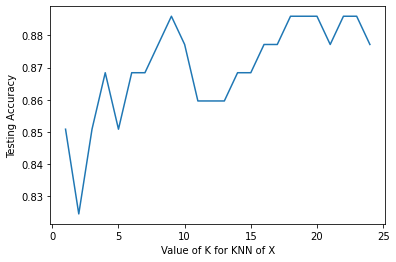

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
X = df[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean']]
Y = df[['diagnosis']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

# print out the shape of X,y,X_train, X_test, Y_train,Y_test
print(X.shape, Y.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

# report Logistic Regression accuracy of X,Y
log_reg_1 = LogisticRegression()
log_reg_1.fit(X, Y)
log_accuracy = log_reg_1.score(X_test, Y_test)
print(log_accuracy)

# report KNN accuracy of X,Y when k=5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X, Y)
preds = knn.predict(X_test)
knn_accuracy = accuracy_score(y_true = Y_test, y_pred = preds)
print(knn_accuracy)

# loop k1-k25 and plot KNN accuracy of X,Y
neighbours = list(range(1, 25))
score = []
for i in neighbours:
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, Y_train)
    preds_neighbors = clf.predict(X_test)
    score.append(accuracy_score(y_true = Y_test, y_pred = preds_neighbors))
plt.plot(neighbours, score)
plt.xlabel('Value of K for KNN of X')
plt.ylabel('Testing Accuracy')
plt.show()

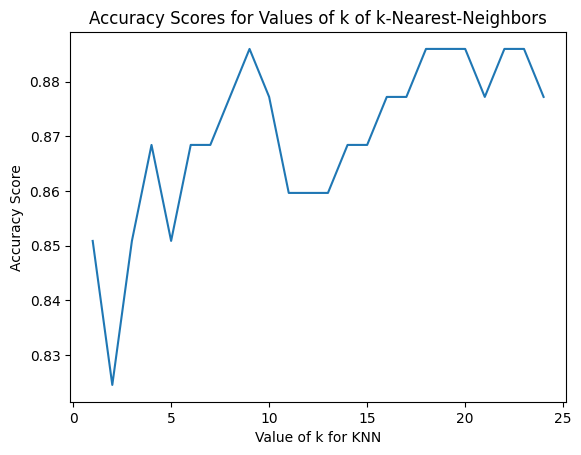

In [ ]:
# Here below is an example of a plot we are looking for in the previous question